![image](https://user-images.githubusercontent.com/57321948/196933065-4b16c235-f3b9-4391-9cfe-4affcec87c35.png)

# Submitted by: Mohammad Wasiq

## Email: gl0427@myamu.ac.in

# Placement Advanced Machine Learning Assignment 3

**Q 3 :** A company wants to predict the sales of its product based on the money spent on different platforms for marketing. They want you to figure out how they can spend money on marketing in the future in such a way that they can increase their profit as much as possible built-in docker and use some library to display that in frontend Dataset. This is the Dataset You can use this dataset for this question. 

Dataset : https://www.kaggle.com/datasets/ashydv/advertising-dataset

**Note :** Use only Dask

**Business Understanding :**

This problem statement we required to make a predictive ML model using given dataset where we have to help the company  to increase profit through multiple advertisement channels like radio, tv, and newspapers of a company.

In [1]:
# Importing libraries

# Default
import os


# dataframe operations
import numpy as np
import math
from dask import dataframe as dd

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Getting the present working directory

os.getcwd()

'C:\\Users\\Sai'

In [3]:
# Changing the directory to dataset directory to read data 

os.chdir('D:\\FSDS-iNeuron\\3.Resource\\Dataset\\Placement_Task\\AdvertisingDataset')

In [4]:
os.getcwd()

'D:\\FSDS-iNeuron\\3.Resource\\Dataset\\Placement_Task\\AdvertisingDataset'

In [5]:
# List of files

os.listdir()

['advertising.csv', 'archive.zip']

In [6]:
# Reading 1000 rows of data
# Using head() to force compute and show rows

df = dd.read_csv('advertising.csv').head(n=200)  # Act like pandas dataframe
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
dd.DataFrame

dask.dataframe.core.DataFrame

### Let's Understand the data

**Data Set Information:**

    This dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like     radio, tv, and newspapers. It is required to understand the impact of ad budgets on the overall sales.
    
**Attribute information:**

TV Ad Budget ($) : Budget for TV Advertisements in 1000$

Radio Ad Budget ($) : Budget for Radio Advertisements in 1000$

Newspaper Ad Budget ($) : Budget for Newspaper Advertisements in 1000$

Sales ($) : Sales Revenue in M$

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
# Shape of the data

df.shape

(200, 4)

In [10]:
# Data type of columns

df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
# Description of the data

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
# Basic information on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# Columns of the datadet

df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
# Checking nul values

df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
df.isnull().sum() / len(df) * 100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

#### Observation:
- There are 0 missing data

In [16]:
# Checking duplicate records

df.duplicated().sum()

0

#### Observation:
- There are 0 duplicate data

In [17]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### EDA

### Univariate Analysis

**"TV"**

<Axes: >

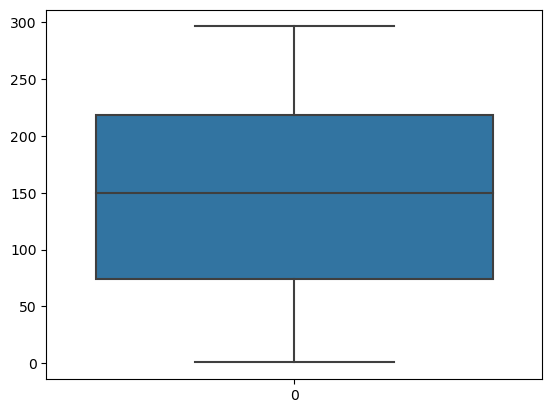

In [18]:
sns.boxplot(df['TV'])

**Observation:**
- There is no outlier in this column

<Axes: xlabel='TV', ylabel='Density'>

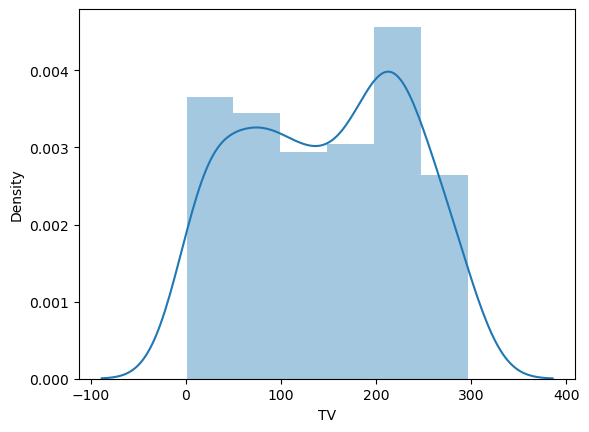

In [19]:
sns.distplot(df['TV'])

**Observation:**
- Dataet is approx normally distributed

**"Radio"**

<Axes: >

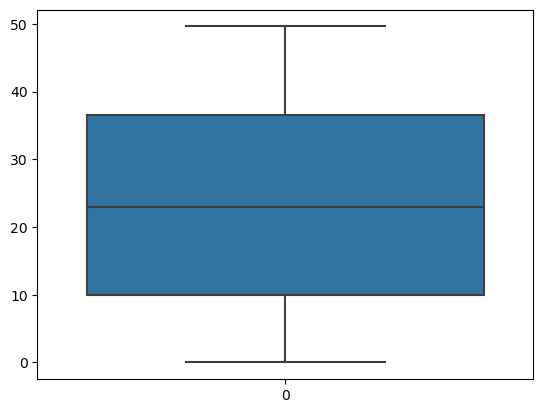

In [20]:
sns.boxplot(df['Radio'])

**Observation:**
- There is no outlier in this column

<Axes: xlabel='Radio', ylabel='Density'>

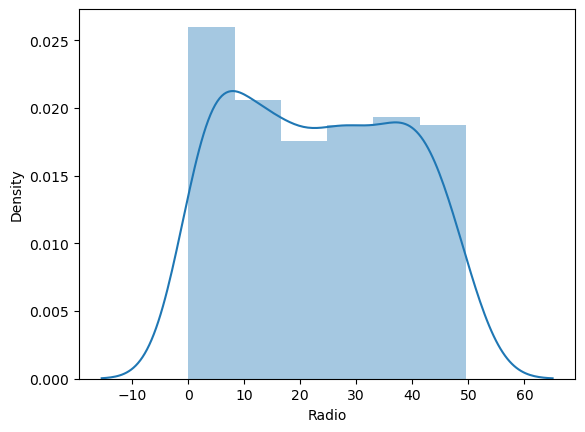

In [21]:
sns.distplot(df['Radio'])

**"Newspaper"**

<Axes: >

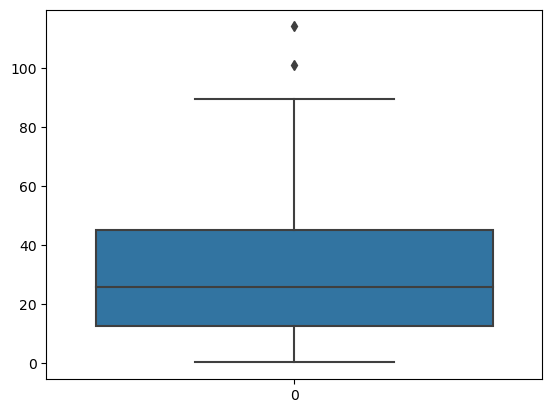

In [22]:
sns.boxplot(df['Newspaper'])

**Observation:**
- There are outliers in the higher side of the distribution

<Axes: xlabel='Newspaper', ylabel='Density'>

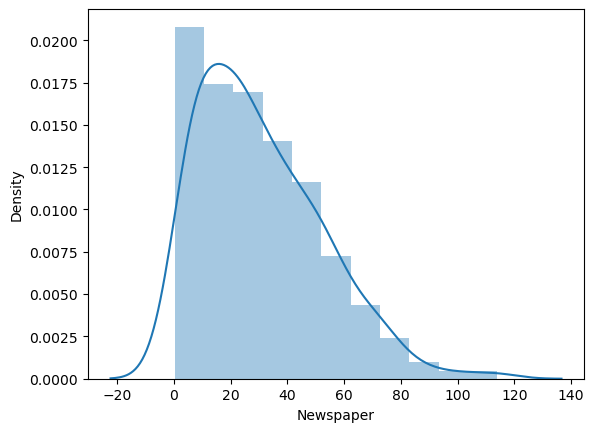

In [23]:
sns.distplot(df['Newspaper'])

**Observation:**
- Dataet is right skewed distributed

**"Sales"**

<Axes: >

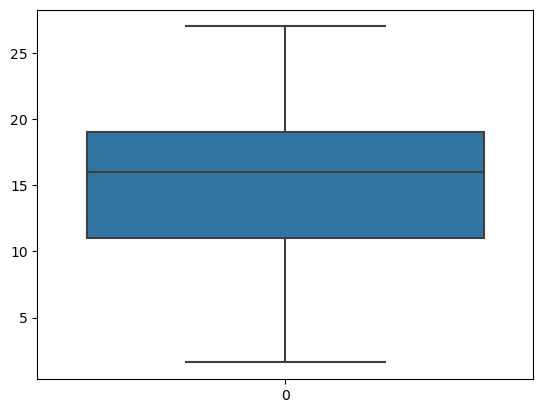

In [24]:
sns.boxplot(df['Sales'])

<Axes: xlabel='Sales', ylabel='Density'>

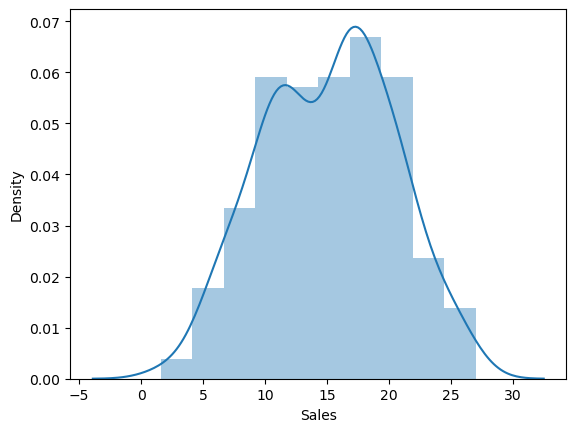

In [25]:
sns.distplot(df['Sales'])

**Observation:**
- Dataet is approx normally distributed

### Bivariate Analysis

**'TV' & 'Sales'**

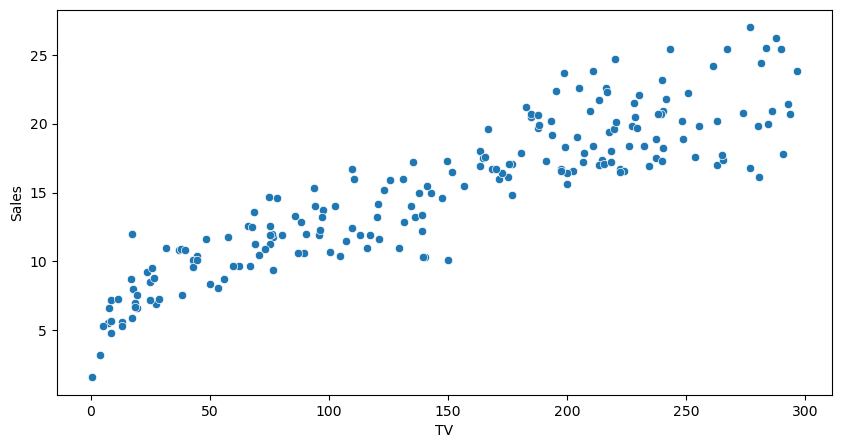

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.show()

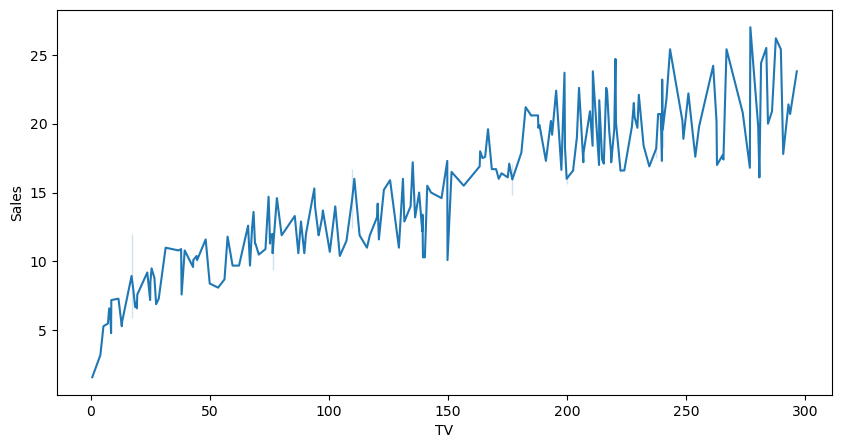

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='TV', y='Sales')
plt.show()

**Observation:**
- 'TV' and 'Sales' are highly correlated

**'Radio' & 'Sales'**

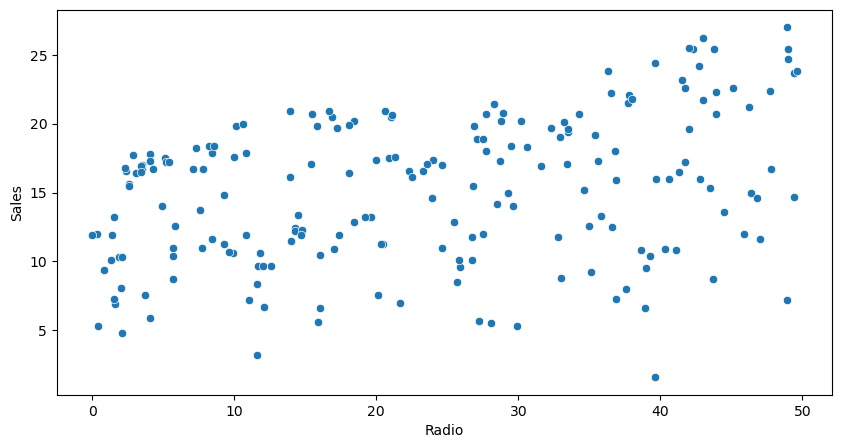

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.show()

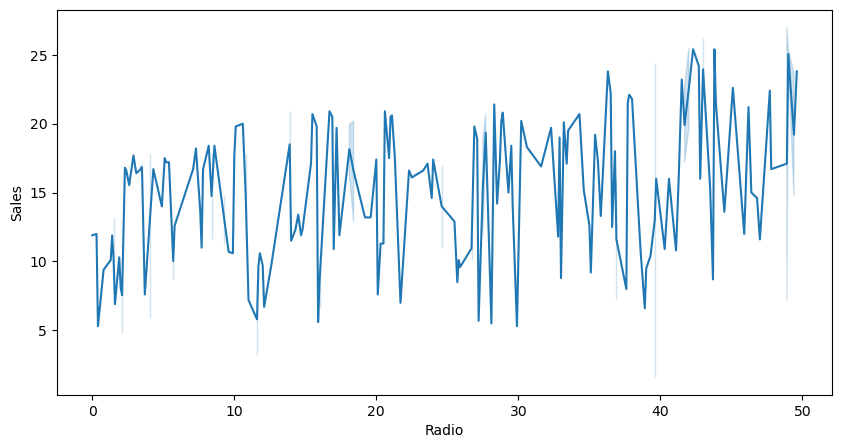

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Radio', y='Sales')
plt.show()

**Observation:**
- 'Sales' and 'Radio' are slightly politively correlated

**'Newspaper' & 'Sales'**

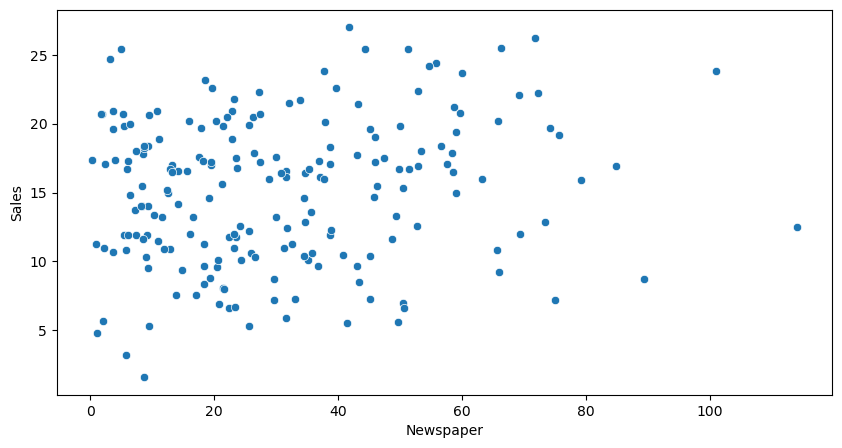

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.show()

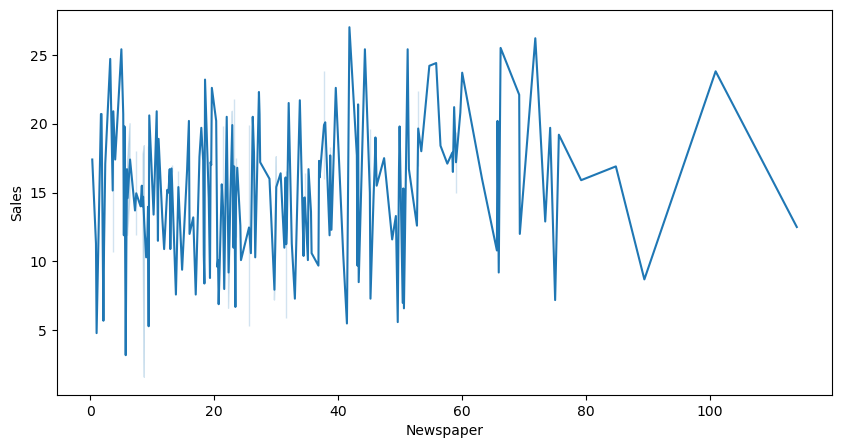

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Newspaper', y='Sales')
plt.show()

**Observation:**
- 'Sales' and 'Newspaper' are less politively correlated

### Multivariate Analysis

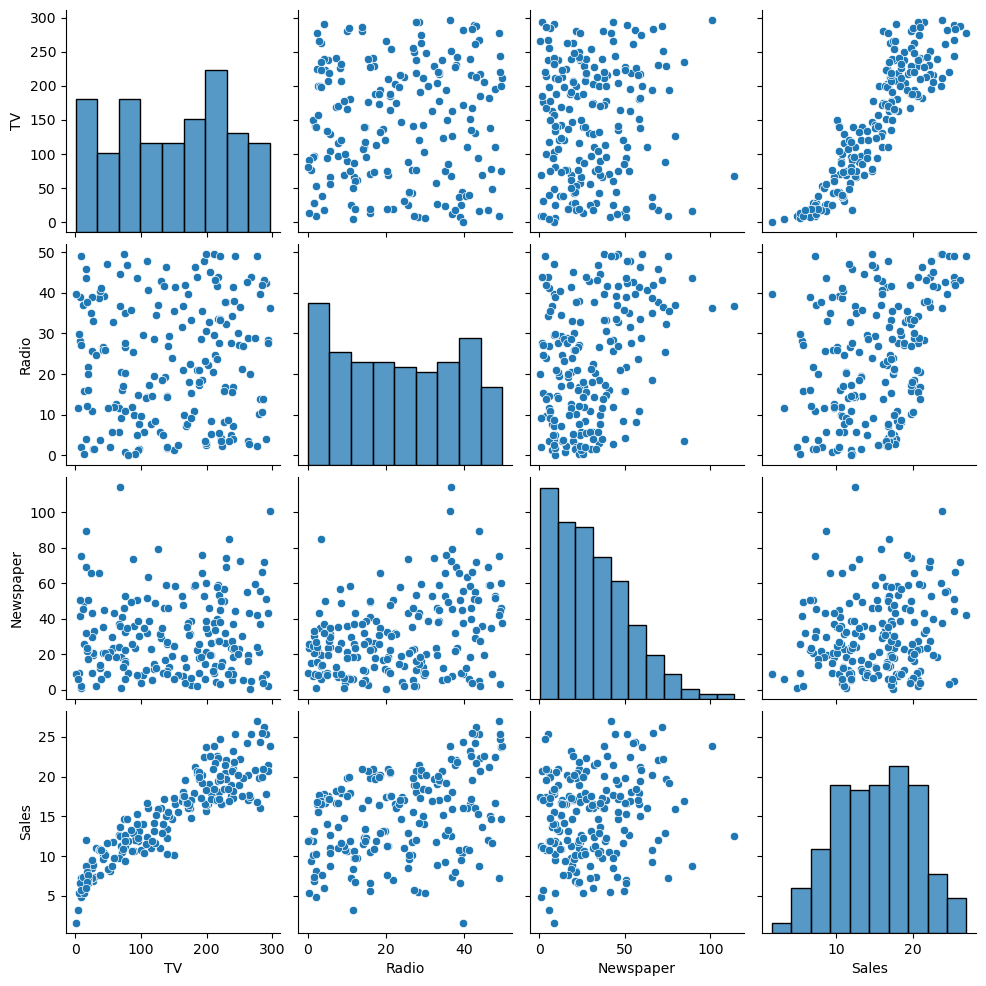

In [32]:
### Pair plot

sns.pairplot(df)

In [33]:
# To check the correlation

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

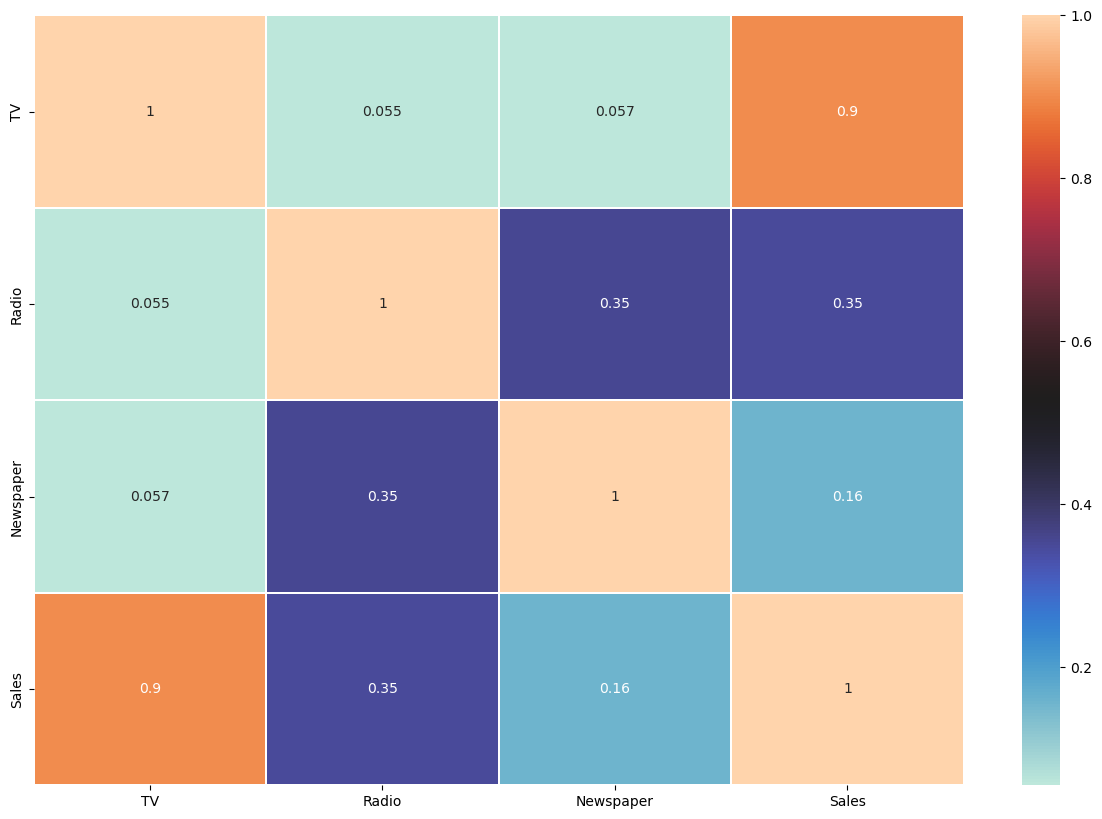

In [34]:
# Heatmap : To check the correlation

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire', linewidths=0.2)

**Observation:**
- From the above graph we can see TV advertisement has more impact on sales

In [35]:
# Pandas profiling
from pandas_profiling import ProfileReport

pf = ProfileReport(df)

In [36]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Feature Selection
#### Defining X and y
We are considering 'TV' in fature because of high correlation

In [37]:
X = df[["TV"]]
y = df["Sales"]

### Train-test split

In [38]:
# Considering 70% as training data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [39]:
X_train

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3
...,...
87,110.7
103,187.9
67,139.3
24,62.3


In [40]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [41]:
# Shape of the splitted data

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 1) (60, 1) (140,) (60,)


### Standardization

In [42]:
scaler = StandardScaler()

In [43]:
X_train_tf = scaler.fit_transform(X_train)

In [44]:
X_test_tf = scaler.transform(X_test)

## Model Training

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train_tf, y_train)

LinearRegression()

In [47]:
y_pred_train = lr.predict(X_train_tf)

In [48]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train, y_pred_train)
print('Train score: ',round(train_score*100, 1), '%')

Train score:  81.6 %


In [49]:
y_pred_test = lr.predict(X_test_tf)

In [50]:
test_score = r2_score(y_test, y_pred_test)
print('Test model score: ', round(test_score*100, 1), '%')

Test model score:  79.2 %


**Observation:**
- Model is generalized 

In [51]:
### Model prediction using single input

lr.predict([[45]])

array([242.1356839])

In [52]:
### Model prediction using list of input

l = [4, 6, 10, 20, 15, 18, 43, 52, 67]
for i in l:
    print(lr.predict([[i]]))

[35.19504492]
[45.28971023]
[65.47904087]
[115.95236745]
[90.71570416]
[105.85770213]
[232.04101858]
[277.4670125]
[353.17700237]
